<a href="https://colab.research.google.com/github/janetomsamondi/PREDICTION_MODEL/blob/main/DISEASE_PREDICTION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *USING MACHINE LEARNING PREDICTON MODEL TOGETHER WITH A DATASET OF VARIOUS VARIABLES, I USE DIABETES TO PREDICT HEART FAILURE*

importing the required libraries

In [1]:
#import dependancies
#numpy to make numpy arrays,pandas to create data frame(more structured way)
#train test split to split data into train and test data
#accuracy score to evaluate our model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import csv

getting the data

In [4]:
from google.colab import files
my_data = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (1).csv


DATA CLEANING

In [41]:
my_data= pd.read_csv( 'heart_failure_clinical_records_dataset (1).csv')
my_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [42]:
my_data.shape

(299, 13)

In [43]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [44]:
#statistical measures about the data
my_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


let....
0----Heart failure
1-----Healthy heart
let's use death_event as our target

In [45]:
#chosing the target variable
#checking distribution of target variable
my_data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [46]:
#dropping the target variable
X=my_data.drop(columns = 'DEATH_EVENT',axis=1)
print(X)

      age  anaemia  creatinine_phosphokinase  ...  sex  smoking  time
0    75.0        0                       582  ...    1        0     4
1    55.0        0                      7861  ...    1        0     6
2    65.0        0                       146  ...    1        1     7
3    50.0        1                       111  ...    1        0     7
4    65.0        1                       160  ...    0        0     8
..    ...      ...                       ...  ...  ...      ...   ...
294  62.0        0                        61  ...    1        1   270
295  55.0        0                      1820  ...    0        0   271
296  45.0        0                      2060  ...    0        0   278
297  45.0        0                      2413  ...    1        1   280
298  50.0        0                       196  ...    1        1   285

[299 rows x 12 columns]


In [47]:
#let Y represent the target variable
Y = my_data['DEATH_EVENT']
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64


data splitting

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y,random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(299, 12) (239, 12) (60, 12)


In [ ]:
choosing the model

In [49]:
#model training
#Logistic Regression
#training the logisticRegressionmodel with Training data
model = LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

MODEL EVALUATION


check on the accuacy of the training data

In [50]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8326359832635983


accuracy on testing data

In [51]:
#accuracy on test data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)


Accuracy on Test data :  0.8


In [52]:
#building a predictive system
input_data = (90,1,47,0,40,1,204000,2.1,132,1,1,8)
#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,  -1)
prediction = model.predict(input_data_reshaped)
print(prediction)

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [53]:
if prediction[0]== 0:
    print('Heart Failure')
else:
    print('Healthy Heart')

Healthy Heart


DATA VISUALIZATION

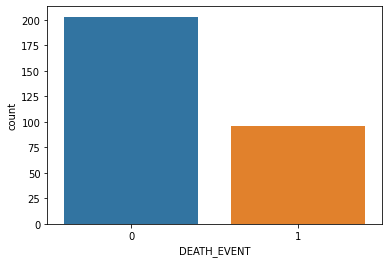

In [54]:
sns.countplot(x='DEATH_EVENT', data=my_data)

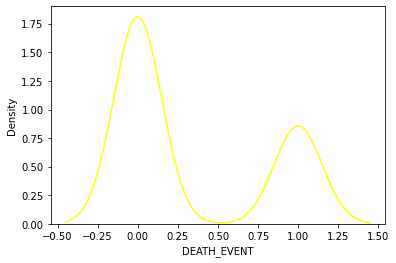

In [55]:
sns.kdeplot(x='DEATH_EVENT',data=my_data,color = 'yellow')